# EDA E1I4 결론 도출

##  데이터 입력 및 결합

- 앞서 분석한 데이터들에 대해 시군구 코드에 대해 매핑하고, 생성한 독립 변수들을 불러오고 결합합니다.

In [1]:
import pandas as pd
import scipy.stats as spst
import folium
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [2]:
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 시군구 코드와 차지구 확인
standard.head()

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구


### 데이터 불러오기
- 앞서 분석하고 생성한 csv파일들을 모두 불러옵니다.

In [4]:
df_seoul1 = pd.read_csv('df_seoul_moving_1020.csv', sep=",", encoding = 'ANSI')
df_seoul2 = pd.read_csv('df_seoul_moving_night2.csv', sep=",", encoding = 'ANSI')
df_seoul3 = pd.read_csv('df_seoul_moving_night3.csv', sep=",", encoding = 'ANSI')
df_seoul4 = pd.read_csv('minhee_H0_3.csv', sep=",", encoding = 'ANSI')
df_seoul5 = pd.read_csv('minhee_HO_1.csv', sep=",", encoding = 'ANSI')
df_seoul6 = pd.read_csv('need1.csv', sep=",", encoding = 'ANSI')
df_seoul7 = pd.read_csv('need2.csv', sep=",", encoding = 'ANSI')
df_seoul8 = pd.read_csv('need3.csv', sep=",", encoding = 'ANSI')
df_seoul9 = pd.read_csv('seoul_people_oldRate.csv', sep=",", encoding = 'ANSI')
df_seoul_scale = pd.read_csv('seoul_scale.csv', sep =",", encoding ='ANSI')

In [5]:
df_seoul1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   자치구             25 non-null     object 
 1   노선수             25 non-null     int64  
 2   정류장수            25 non-null     int64  
 3   10~20대 하차승객수    25 non-null     int64  
 4   평균 이동 시간(분) 평균  25 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [6]:
#데이터 결합
df = pd.merge(standard,df_seoul1,how='inner', on='자치구')
df = pd.merge(df,df_seoul2,how='inner', on='자치구')
df = pd.merge(df,df_seoul3,how='inner', on='자치구')
df = pd.merge(df,df_seoul4,how='inner', on='자치구')
df = pd.merge(df,df_seoul5,how='inner', on='자치구')
df = pd.merge(df,df_seoul6,how='inner', on='자치구')
df = pd.merge(df,df_seoul7,how='inner', on='자치구')
df = pd.merge(df,df_seoul8,how='inner', on='자치구')
df = pd.merge(df,df_seoul9,how='inner', on='자치구')
df = pd.merge(df,df_seoul_scale,how='inner', on='자치구')

In [7]:
# 25개 자치구에 대한 변수들 정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   도착 시군구 코드                   25 non-null     int64  
 1   자치구                         25 non-null     object 
 2   노선수                         25 non-null     int64  
 3   정류장수                        25 non-null     int64  
 4   10~20대 하차승객수                25 non-null     int64  
 5   평균 이동 시간(분) 평균              25 non-null     float64
 6   평일 퇴근시간(18~21)대 하차승객수       25 non-null     int64  
 7   금, 토, 일 밤시간대(21~06) 하차 승객수  25 non-null     int64  
 8   이동인구(합)                     25 non-null     float64
 9   총 이동시간(분)                   25 non-null     float64
 10  평일 출근시간 총이동인구(합)            25 non-null     float64
 11  택시 종사자수                     25 non-null     int64  
 12  종사자수합                       25 non-null     int64  
 13  총승객수                        25 non-nu

In [8]:
df_new = df.loc[:,['자치구', '노선수','정류장수',
                  '이동인구(합)', '총 이동시간(분)','택시 종사자수', '총승객수', '65세이상고령자','평균 이동 시간(분) 평균']]
df_new.columns = ['자치구', '노선수','정류장수',
                  '이동인구(합)', '총 이동시간(분)','택시종사자수', '승차총승객수', '65세이상고령자','평균이동시간']

In [9]:
df_new[['택시종사자수','평균이동시간','승차총승객수']].describe()

,택시종사자수,평균이동시간,승차총승객수
count,25.000000,25.000000,2.500000e+01
mean,3068.040000,23.378500,9.712738e+06
std,1963.159772,1.363460,2.819409e+06
min,215.000000,21.524817,5.502859e+06
25%,1838.000000,22.150334,7.533464e+06
50%,2589.000000,23.162536,9.673189e+06
75%,4850.000000,24.355289,1.124523e+07
max,6922.000000,25.931701,1.559970e+07


### 히트맵 시각화
- 각 독립변들에 대한 상관계수를 확인하고, 유의미한 지표를 보이는 변수를 확인하기 위해 시각화 합니다.

Text(0.5, 1.0, '상관관계 히트맵')

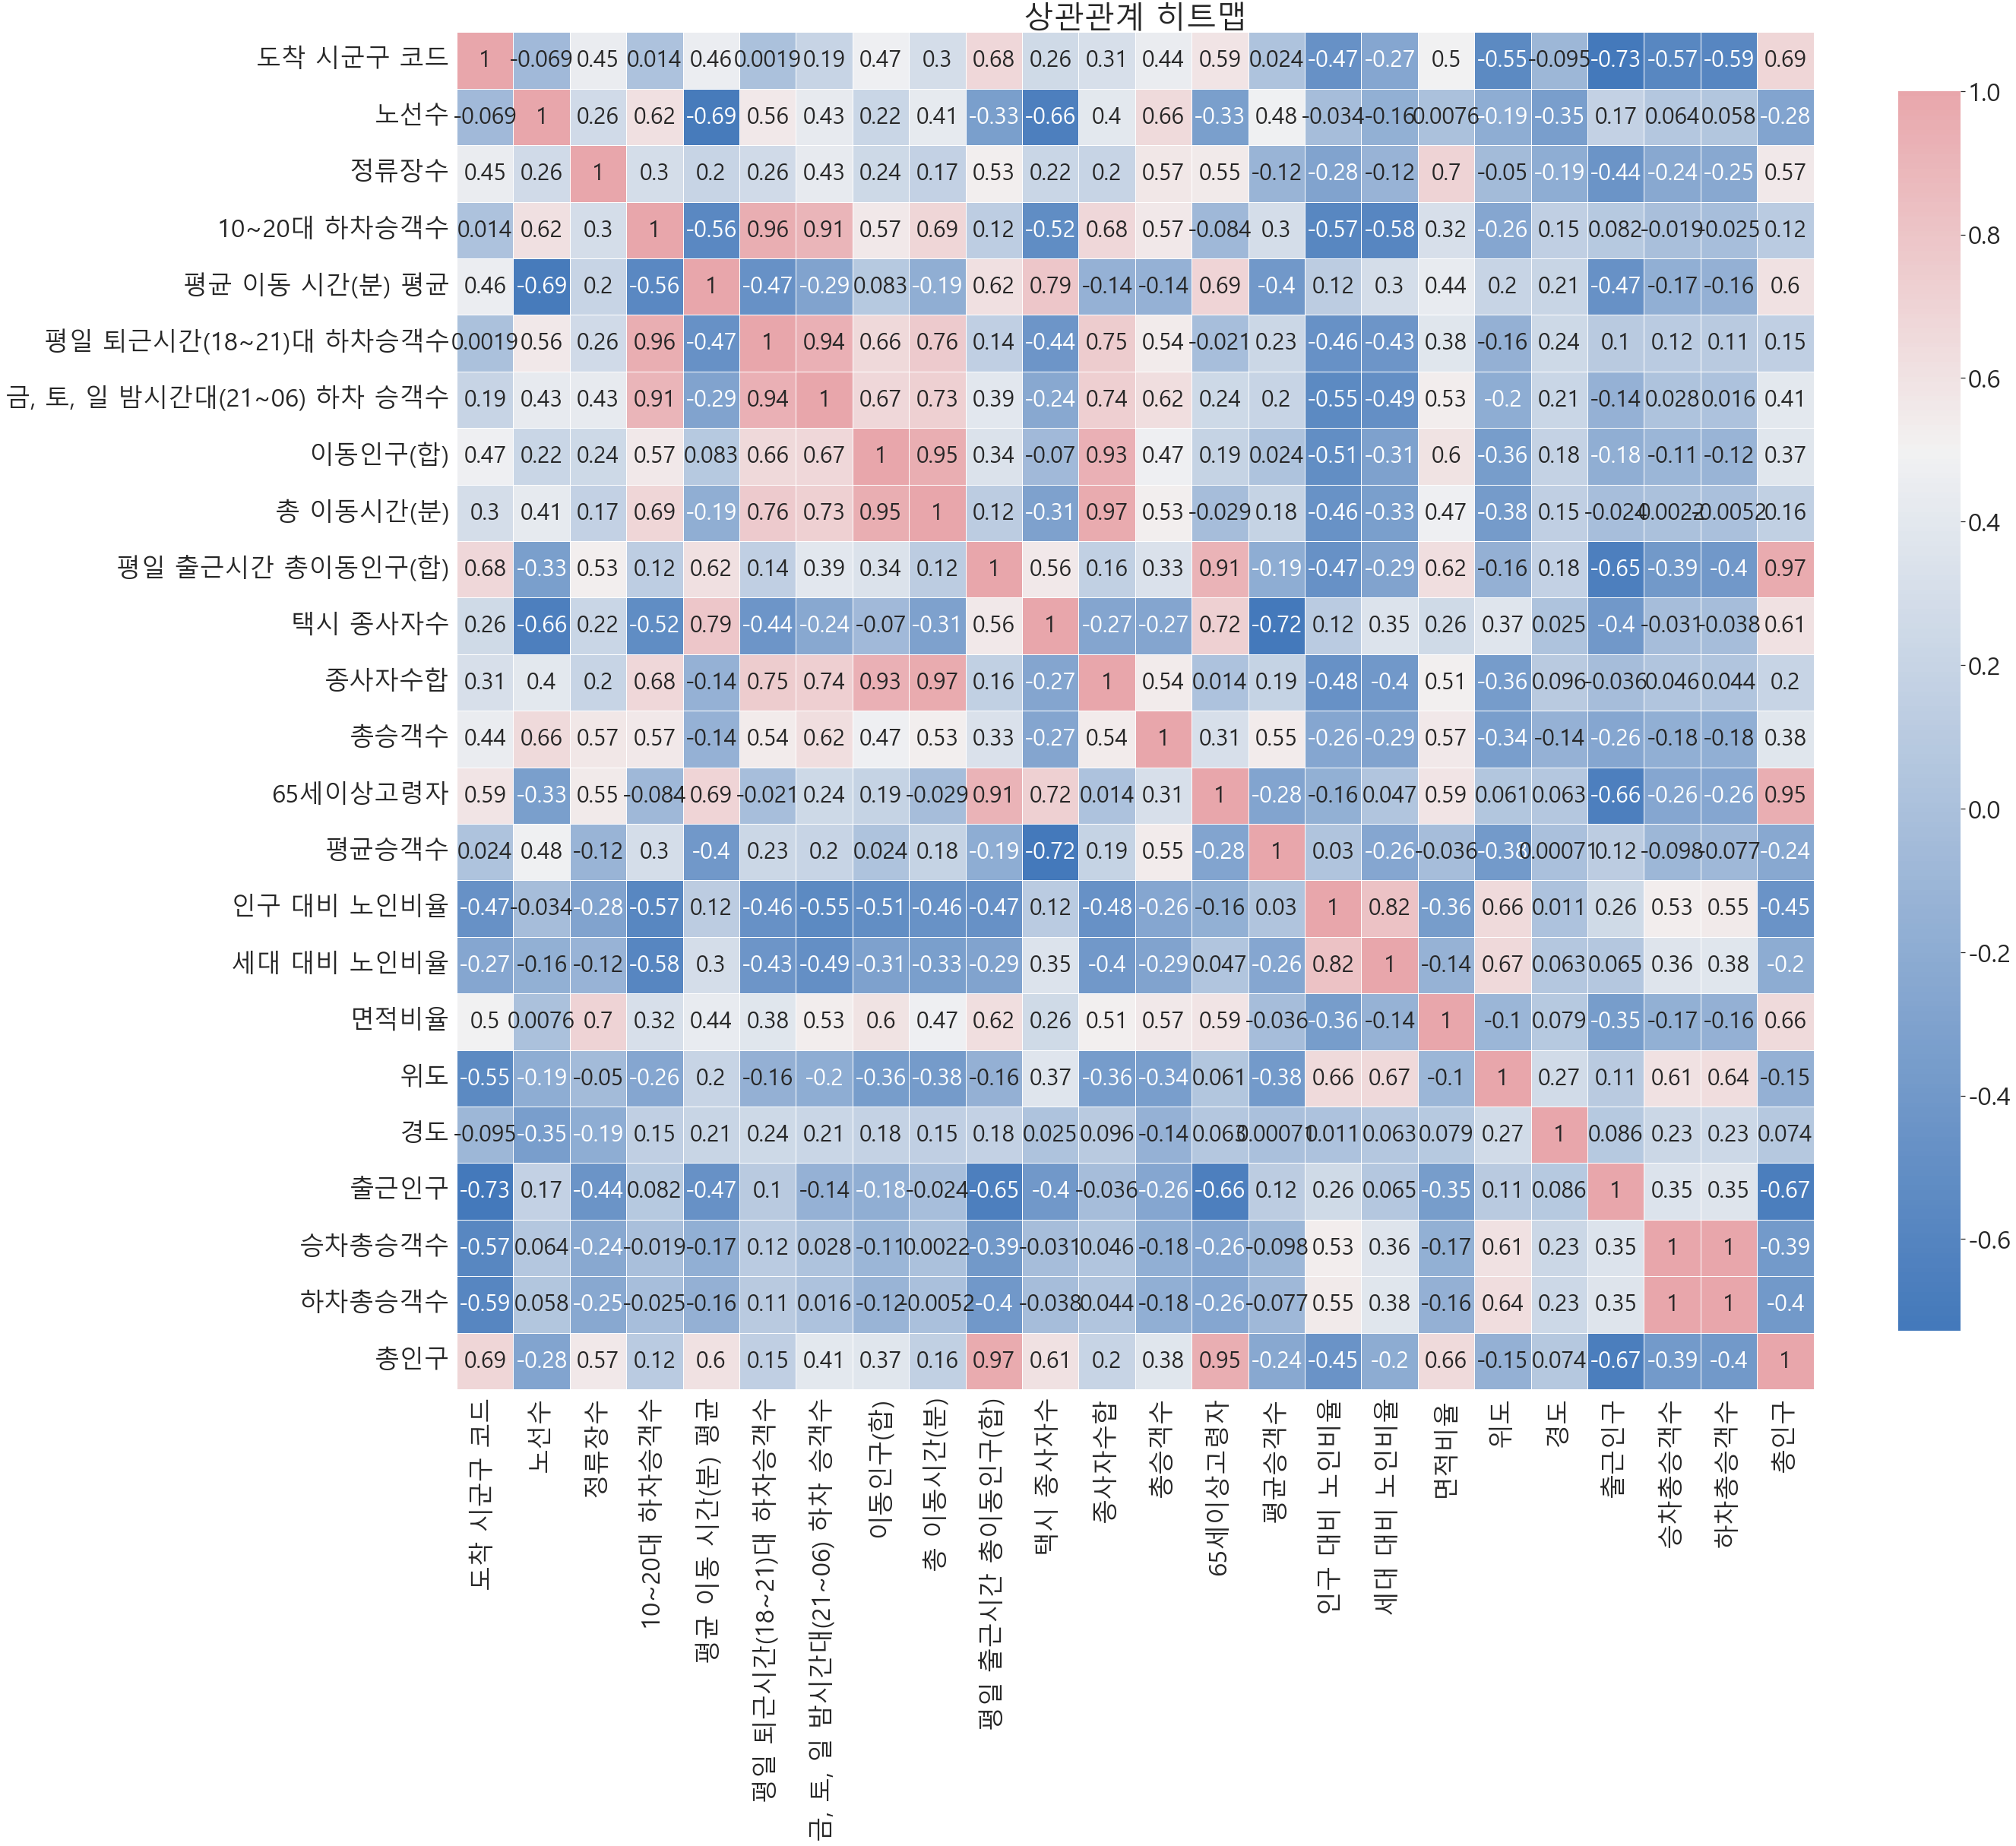

In [10]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid',
        font_scale = 3)

cor = df.corr()
f, ax = plt.subplots(figsize=(40, 40))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(cor, cmap=cmap, center=0.5, 
            square=True, linewidths=0.5,
            annot_kws={"size": 30},
            cbar_kws={"shrink": 0.75}, annot=True)

plt.title('상관관계 히트맵', size=40)

In [76]:
# 상관계수 예시 출력
spst.pearsonr(df_new['평균이동시간'],df_new['노선수'])

(-0.6935652966876098, 0.00012083974528663568)

### Seaborn을 활용한 데이터 시각화

- 앞서 살펴본 변수들 중, 상관계수가 높은 변수에 대해 각 자치구별 시각화를 진행합니다.

[참고] 공식 Document
* Seaborn(https://seaborn.pydata.org/api.html)
* Seaborn.CountChart(https://seaborn.pydata.org/generated/seaborn.countplot.html)
* Seaborn.Distplot(https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot) : 히스토그램 + 커널밀도
* Seaborn.Boxplot(https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)
* Seaborn.Heatmap(https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)
* Seaborn.Pairplot(https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) : 조합별 히스토그램 + 산점도

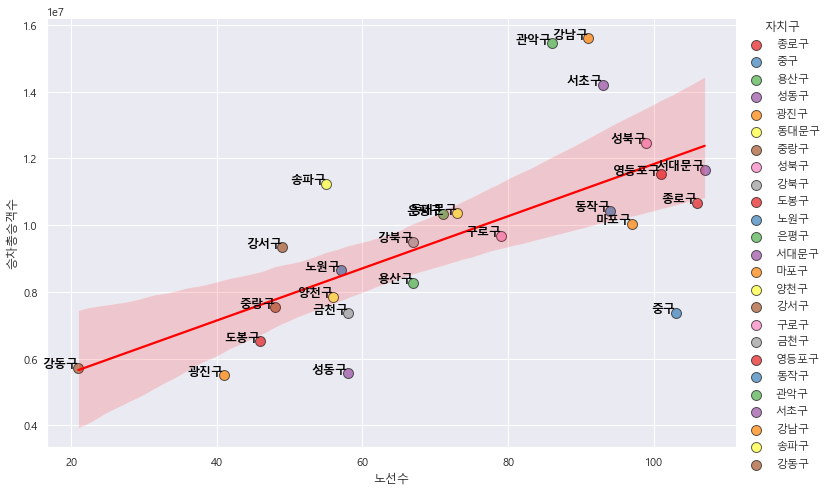

In [44]:
# 승차 총 승객수에 대한 시각화

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid',
        font_scale = 1)


joint = sns.lmplot(x= "노선수", y = "승차총승객수", data= df_new,  palette="Set1",
                   ci =None,scatter_kws={"s": 100, "alpha": 0.7, "edgecolor": "k", "linewidth": 1, "cmap": "Set1"},
                   height=7, aspect=1.5,
                   hue = "자치구"
                   )


sns.regplot(x="노선수", y="승차총승객수", data=df_new, scatter=False,  color='red')
for line in range(0,df_new.shape[0]):
     plt.text(df_new.노선수.iloc[line], df_new.승차총승객수.iloc[line]+2, df_new["자치구"].iloc[line], horizontalalignment='right', size='medium', color='black', weight='semibold')
       
plt.show()

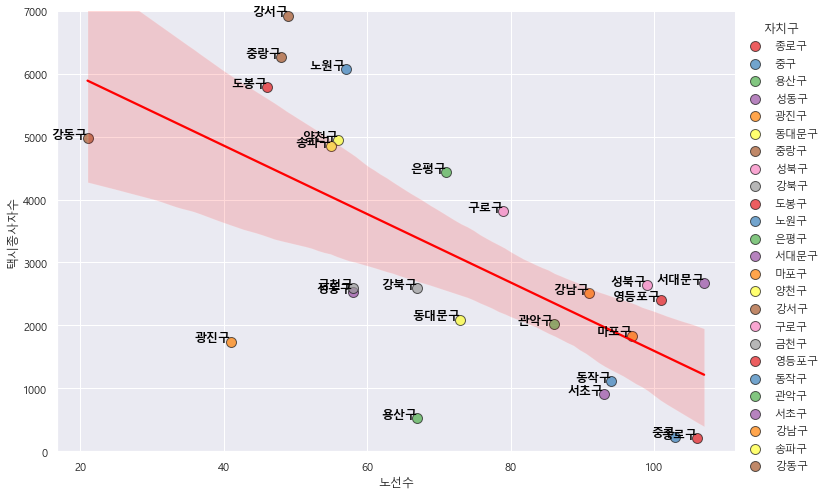

In [60]:
#택시 종사자 수에 대한 시각화
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid',
        font_scale = 1)

joint = sns.lmplot(x= "노선수", y = "택시종사자수", data= df_new,  palette="Set1",
                   ci =None,scatter_kws={"s": 100, "alpha": 0.7, "edgecolor": "k", "linewidth": 1, "cmap": "Set1"},
                   height=7, aspect=1.5,
                   hue = "자치구"
                   )

joint.set(ylim=(0, 7000))
sns.regplot(x="노선수", y="택시종사자수", data=df_new, scatter=False,  color='red')

for line in range(0,df_new.shape[0]):
     plt.text(df_new.노선수.iloc[line], df_new.택시종사자수.iloc[line]+2, df_new["자치구"].iloc[line], horizontalalignment='right', size='medium', color='black', weight='semibold')
plt.show()

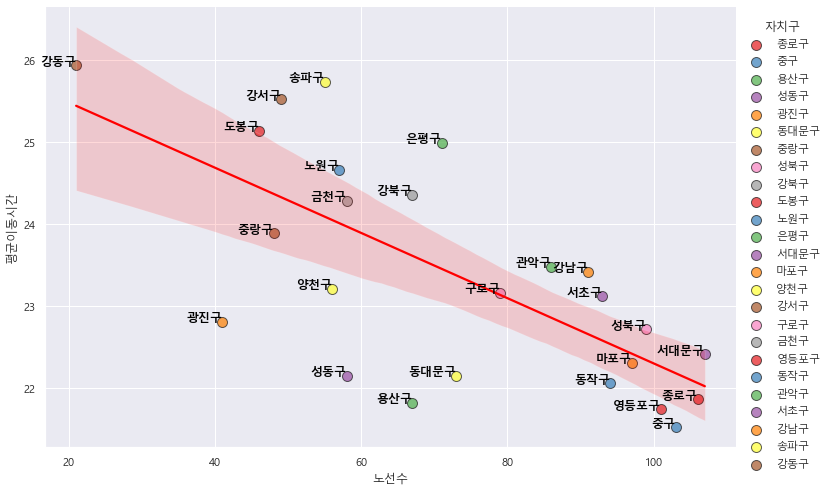

In [79]:
#평균 이동시간에 대한 시각화
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid',
        font_scale = 1)

joint = sns.lmplot(x= "노선수", y = "평균이동시간", data= df_new,  palette="Set1",
                   ci =None,scatter_kws={"s": 100, "alpha": 0.7, "edgecolor": "k", "linewidth": 1, "cmap": "Set1"},
                   height=7, aspect=1.5,
                   hue = "자치구"
                   )

sns.regplot(x="노선수", y="평균이동시간", data=df_new, scatter=False,  color='red')

for line in range(0,df_new.shape[0]):
     plt.text(df_new.노선수.iloc[line], df_new.평균이동시간.iloc[line], df_new["자치구"].iloc[line], horizontalalignment='right', size='medium', color='black', weight='semibold')
plt.show()

## 결론 도출 방식
1. 먼저 각 세 변수들에 대해 회귀 분석을 진행합니다.
2. 각 변수들에 대한 자치구들의 mse를 구하고, 그 차이만큼을 점수로 스코어링합니다.
3. 각 변수 자체로 가지는 중요도를 상관관계로 가중합 하는 과정을 거쳐 최종 점수를 도출합니다.

In [62]:
slope, intercept = np.polyfit(df_new['노선수'], df_new['승차총승객수'], 1)
predictDf = pd.DataFrame()
# 예측값 계산
predicted1 =  (df_new['승차총승객수'] - (slope * df_new['노선수'] + intercept))
df_new['승차총승객 거리차'] = predicted1

df_new_sorted = df_new[['자치구', '승차총승객 거리차']].sort_values(['승차총승객 거리차'],ascending=False)
df_new_sorted = df_new_sorted[:6]


min_val = df_new_sorted['승차총승객 거리차'].min()
max_val = df_new_sorted['승차총승객 거리차'].max()
df_new_sorted['승차총승객 거리차'] = (df_new_sorted['승차총승객 거리차'] - min_val) / (max_val - min_val) *0.65967

df_new_sorted

,자치구,승차총승객 거리차
20,관악구,0.659670
22,강남구,0.619746
23,송파구,0.362351
21,서초구,0.359931
15,강서구,0.121572
11,은평구,0.000000


In [63]:
slope, intercept = np.polyfit(df_new['노선수'], df_new['택시종사자수'], 1)
predictDf = pd.DataFrame()
# 예측값 계산
predicted1 =  (df_new['택시종사자수'] - (slope * df_new['노선수'] + intercept))
df_new['택시종사자 거리차'] = predicted1

df_new_sorted1 = df_new[['자치구', '택시종사자 거리차']].sort_values(['택시종사자 거리차'],ascending=False)
df_new_sorted1 = df_new_sorted1[:6]

min_val = df_new_sorted1['택시종사자 거리차'].min()
max_val = df_new_sorted1['택시종사자 거리차'].max()
df_new_sorted1['택시종사자 거리차'] = (df_new_sorted1['택시종사자 거리차'] - min_val) / (max_val - min_val) *0.65898

df_new_sorted1

,자치구,택시종사자 거리차
15,강서구,0.658980
10,노원구,0.449804
6,중랑구,0.297437
12,서대문구,0.105603
11,은평구,0.002765
9,도봉구,0.000000


In [64]:
slope, intercept = np.polyfit(df_new['노선수'], df_new['평균이동시간'], 1)
predictDf = pd.DataFrame()
# 예측값 계산
predicted1 =  (df_new['평균이동시간'] - (slope * df_new['노선수'] + intercept)) 
df_new['평균이동시간 거리차'] = predicted1

df_new_sorted2 = df_new[['자치구', '평균이동시간 거리차']].sort_values(['평균이동시간 거리차'],ascending=False)
df_new_sorted2 = df_new_sorted2[:6]

min_val = df_new_sorted2['평균이동시간 거리차'].min()
max_val = df_new_sorted2['평균이동시간 거리차'].max()
df_new_sorted2['평균이동시간 거리차'] = (df_new_sorted2['평균이동시간 거리차'] - min_val) / (max_val - min_val) *0.69356

df_new_sorted2

,자치구,평균이동시간 거리차
23,송파구,0.693560
11,은평구,0.615772
15,강서구,0.364112
22,강남구,0.049364
8,강북구,0.037180
9,도봉구,0.000000


In [65]:
dfall = pd.merge(df_new_sorted,df_new_sorted1,how='outer', on='자치구')
dfall

,자치구,승차총승객 거리차,택시종사자 거리차
0,관악구,0.659670,NaN
1,강남구,0.619746,NaN
2,송파구,0.362351,NaN
3,서초구,0.359931,NaN
4,강서구,0.121572,0.658980
5,은평구,0.000000,0.002765
6,노원구,NaN,0.449804
7,중랑구,NaN,0.297437
8,서대문구,NaN,0.105603
9,도봉구,NaN,0.000000


In [66]:
dfall = pd.merge(dfall,df_new_sorted2,how='outer', on='자치구')
dfall.columns = ['자치구','승차총승객','택시종사자','평균이동시간']
dfall

,자치구,승차총승객,택시종사자,평균이동시간
0,관악구,0.659670,NaN,NaN
1,강남구,0.619746,NaN,0.049364
2,송파구,0.362351,NaN,0.693560
3,서초구,0.359931,NaN,NaN
4,강서구,0.121572,0.658980,0.364112
5,은평구,0.000000,0.002765,0.615772
6,노원구,NaN,0.449804,NaN
7,중랑구,NaN,0.297437,NaN
8,서대문구,NaN,0.105603,NaN
9,도봉구,NaN,0.000000,0.000000


In [67]:
dfall = dfall.fillna(0)
dfall

,자치구,승차총승객,택시종사자,평균이동시간
0,관악구,0.659670,0.000000,0.000000
1,강남구,0.619746,0.000000,0.049364
2,송파구,0.362351,0.000000,0.693560
3,서초구,0.359931,0.000000,0.000000
4,강서구,0.121572,0.658980,0.364112
5,은평구,0.000000,0.002765,0.615772
6,노원구,0.000000,0.449804,0.000000
7,중랑구,0.000000,0.297437,0.000000
8,서대문구,0.000000,0.105603,0.000000
9,도봉구,0.000000,0.000000,0.000000


In [68]:
dfall['총점수'] = (dfall['승차총승객'].values + dfall['택시종사자'].values + dfall['평균이동시간'].values) *100

,자치구,승차총승객,택시종사자,평균이동시간,총점수
0,관악구,0.659670,0.000000,0.000000,65.967000
1,강남구,0.619746,0.000000,0.049364,66.911011
2,송파구,0.362351,0.000000,0.693560,105.591100
3,서초구,0.359931,0.000000,0.000000,35.993107
4,강서구,0.121572,0.658980,0.364112,114.466383
5,은평구,0.000000,0.002765,0.615772,61.853692
6,노원구,0.000000,0.449804,0.000000,44.980363
7,중랑구,0.000000,0.297437,0.000000,29.743687
8,서대문구,0.000000,0.105603,0.000000,10.560329
9,도봉구,0.000000,0.000000,0.000000,0.000000


In [69]:
df_sorted = dfall.sort_values(by='총점수', ascending=False)
df_sorted

,자치구,승차총승객,택시종사자,평균이동시간,총점수
4,강서구,0.121572,0.658980,0.364112,114.466383
2,송파구,0.362351,0.000000,0.693560,105.591100
1,강남구,0.619746,0.000000,0.049364,66.911011
0,관악구,0.659670,0.000000,0.000000,65.967000
5,은평구,0.000000,0.002765,0.615772,61.853692
6,노원구,0.000000,0.449804,0.000000,44.980363
3,서초구,0.359931,0.000000,0.000000,35.993107
7,중랑구,0.000000,0.297437,0.000000,29.743687
8,서대문구,0.000000,0.105603,0.000000,10.560329
10,강북구,0.000000,0.000000,0.037180,3.718038


## 최종 도출 결과 합산 및 시각화
- 최종적으로 앞선 도출방식에 따라 나온 결과를 결과에 반영하기 위한 시각화를 진행합니다.

<AxesSubplot:xlabel='자치구', ylabel='총점수'>

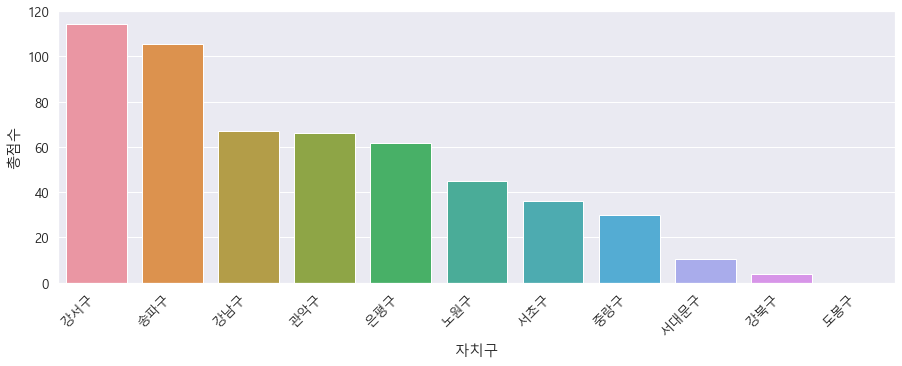

In [71]:
sns.set(font_scale=1.2,
       font="Malgun Gothic")
plt.figure(figsize=(15,5))
plt.xticks(rotation=45, ha='right')
sns.barplot(data = df_sorted,x = '자치구', y= '총점수')